In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Data Access
df = pd.read_excel('C:/Users/yunus/Downloads/Data Deneme/Custom-Dataset.xlsx')

In [3]:
# Baseline Model
# Train a Linear Regression model
target = "BTC_Adj Close"
X = df.drop(columns=[target])
y = df[target]
# print(X.head())
# print(y.head())

In [4]:
# Compute Variance Inflation Factor (VIF) for Multicollinearity on unscaled data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the DataFrame by VIF scores in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                                     feature           VIF
83   Total Transaction Output Volume Per Day  1.473691e+11
80    Total Transaction Input Volume Per Day  1.473546e+11
82      Daily Median Output Volume Per Block  1.040056e+09
79       Daily Median Input Volume Per Block  1.018263e+09
51                              Block Height  2.600972e+03
..                                       ...           ...
183                        Taxes EMV Tracker  1.081490e+00
199                 Trade Policy EMV Tracker  1.080541e+00
112                             Daily_Change  1.055386e+00
136                              Log_Returns  1.035018e+00
138                             Daily_Return  1.032476e+00

[206 rows x 2 columns]


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features as they are on different scales. This is crucial for Linear Regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [9]:
# Evaluate the model
# Calculate R-squared, MSE, RMSE, MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [10]:
print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'Mean Absolute Error (MAE): {mae}')

R-squared: 1.0
Mean Squared Error (MSE): 3.8027649156586244e-21
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 5.133365920617752e-11


In [11]:
# Recursive Feature Elimination (RFE) on scaled data
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Change '5' to the number of features you want to keep

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get the rankings of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

# Features selected by RFE
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')
print(feature_ranking.sort_values(by='Ranking'))

Selected Features: Index(['BTC_Close_lag1', 'BTC_Close_lag2', 'BTC_Close_lag4', 'BTC_MA5',
       'Daily_Change'],
      dtype='object')
                                       Feature  Ranking
93                                     BTC_MA5        1
85                              BTC_Close_lag1        1
88                              BTC_Close_lag4        1
112                               Daily_Change        1
86                              BTC_Close_lag2        1
..                                         ...      ...
18        Lightning Network Clustering-Average      198
103                                        RSI      199
40                                Block Weight      200
141               Federal Funds Effective Rate      201
73   Daily Median Transaction Inputs Per Block      202

[206 rows x 2 columns]


In [12]:
# Variance Inflation Factor (VIF) for Multicollinearity on scaled data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

# Sort the DataFrame by VIF scores in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

C:\Users\yunus\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               feature       VIF
52                                       Miner Revenue       inf
104                                         Volatility       inf
108                                    Bollinger_Upper       inf
59   BitcoinVisuals.com’s node's memory usage for u...       inf
97                                            BTC_MA20       inf
..                                                 ...       ...
24                                       BTC Dominance  5.739001
62                            Total Bitcoin Node Peers  5.540730
126                                                ADX  4.988204
75                Daily Median Output Per Transaction   4.775431
33                                Total Node Bandwidth  2.610044

[206 rows x 2 columns]


In [13]:
# Analyze Feature Coefficients
# Check the coefficients of the Linear Regression model to understand the impact of each factor on the target variable.

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(sorted_coefficients)

                                             Coefficient
BTC_Close_lag1                              6.061873e+04
BTC_MA5                                     2.250722e+04
Daily_Change                                1.265999e+04
Daily Median Input Volume Per Block         4.189991e-08
Daily Median Output Volume Per Transaction  1.872280e-08
...                                                  ...
Agricultural Policy EMV Tracker            -2.335051e-08
Daily Median Output Volume Per Block       -4.194499e-08
BTC_Close_lag4                             -4.611521e+03
BTC_Close_lag2                             -4.611521e+03
BTC_Close_lag3                             -4.611521e+03

[206 rows x 1 columns]


In [14]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99997754 1.         1.         1.         1.        ]
Average cross-validation score: 0.999995507687179


In [15]:
# Time-Series Specific Cross-Validation
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=tscv, scoring='neg_mean_squared_error')
print(f'TimeSeriesSplit cross-validation scores: {-cv_scores}')
print(f'Average TimeSeriesSplit cross-validation score: {-cv_scores.mean()}')

TimeSeriesSplit cross-validation scores: [5.05411275e-20 4.03329978e-21 1.52440533e-21 7.91192944e-21
 1.58918799e-20]
Average TimeSeriesSplit cross-validation score: 1.5980528400538126e-20


In [16]:
# Ridge Regression (L2)
ridge_model = Ridge(alpha=1) # default alpha =1, best alpha=0.1
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)
print(f'Ridge R-squared: {r2_score(y_test, ridge_y_pred)}')
print(f'Ridge MSE: {mean_squared_error(y_test, ridge_y_pred)}')
print(f'Ridge RMSE: {np.sqrt(mean_squared_error(y_test, ridge_y_pred))}')
print(f'Ridge MAE: {mean_absolute_error(y_test, ridge_y_pred)}')

Ridge R-squared: 0.9998196144084206
Ridge MSE: 61754.50669624028
Ridge RMSE: 248.50454059481544
Ridge MAE: 177.9308257691205


In [17]:
# Lasso Regression (L1)
lasso_model = Lasso(alpha=0.01) # default alpha =0.01, best alpha=1.0
lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_model.predict(X_test_scaled)
print(f'Lasso R-squared: {r2_score(y_test, lasso_y_pred)}')
print(f'Lasso MSE: {mean_squared_error(y_test, lasso_y_pred)}')
print(f'Lasso RMSE: {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}')
print(f'Lasso MAE: {mean_absolute_error(y_test, lasso_y_pred)}')

Lasso R-squared: 0.9998960412919523
Lasso MSE: 35589.97520841178
Lasso RMSE: 188.6530551261012
Lasso MAE: 136.46975872230777


In [18]:
# Elastic Net
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5) # default alpha=0.01, l1_ratio=0.5, best alpha=1, l1_ratio=1
elastic_net.fit(X_train_scaled, y_train)
elastic_y_pred = elastic_net.predict(X_test_scaled)
print(f'ElasticNet R-squared: {r2_score(y_test, elastic_y_pred)}')
print(f'ElasticNet MSE: {mean_squared_error(y_test, elastic_y_pred)}')
print(f'ElasticNet RMSE: {np.sqrt(mean_squared_error(y_test, elastic_y_pred))}')
print(f'ElasticNet MAE: {mean_absolute_error(y_test, elastic_y_pred)}')

ElasticNet R-squared: 0.9990215941078564
ElasticNet MSE: 334954.5420395507
ElasticNet RMSE: 578.752574110518
ElasticNet MAE: 415.9925639162611


C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+09, tolerance: 7.025e+07
  model = cd_fast.enet_coordinate_descent(


In [19]:
# Hyperparameter Tuning
# Grid Search for Hyperparameters
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
lasso_params = {'alpha': [0.1, 1.0, 10, 100]}
elastic_params = {'alpha': [0.01, 0.1, 1, 10, 100],
                  'l1_ratio': [0, 0.1, 0.5, 0.9, 1]}

ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_search = GridSearchCV(ElasticNet(), elastic_params, cv=5, scoring='neg_mean_squared_error')

ridge_search.fit(X_train_scaled, y_train)
lasso_search.fit(X_train_scaled, y_train)
elastic_search.fit(X_train_scaled, y_train)

print(f'Best Ridge alpha: {ridge_search.best_params_}')
print(f'Best Lasso alpha: {lasso_search.best_params_}')
print(f'Best ElasticNet params: {elastic_search.best_params_}')

C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+08, tolerance: 5.554e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+08, tolerance: 5.533e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+08, toleranc

Best Ridge alpha: {'alpha': 0.1}
Best Lasso alpha: {'alpha': 1.0}
Best ElasticNet params: {'alpha': 1, 'l1_ratio': 1}


C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+08, tolerance: 7.025e+07
  model = cd_fast.enet_coordinate_descent(


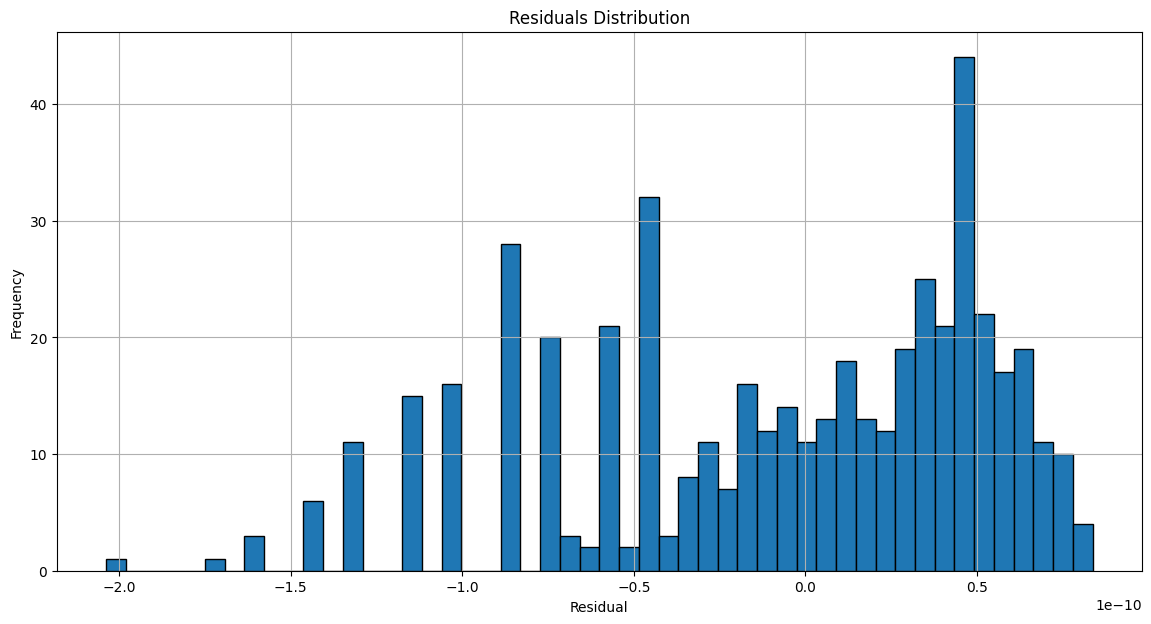

In [20]:
# Model Output Visualization
# Residual Distribution, Plot actual - predicted values
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('residuals_distribution.png')  # Save the plot
plt.show()

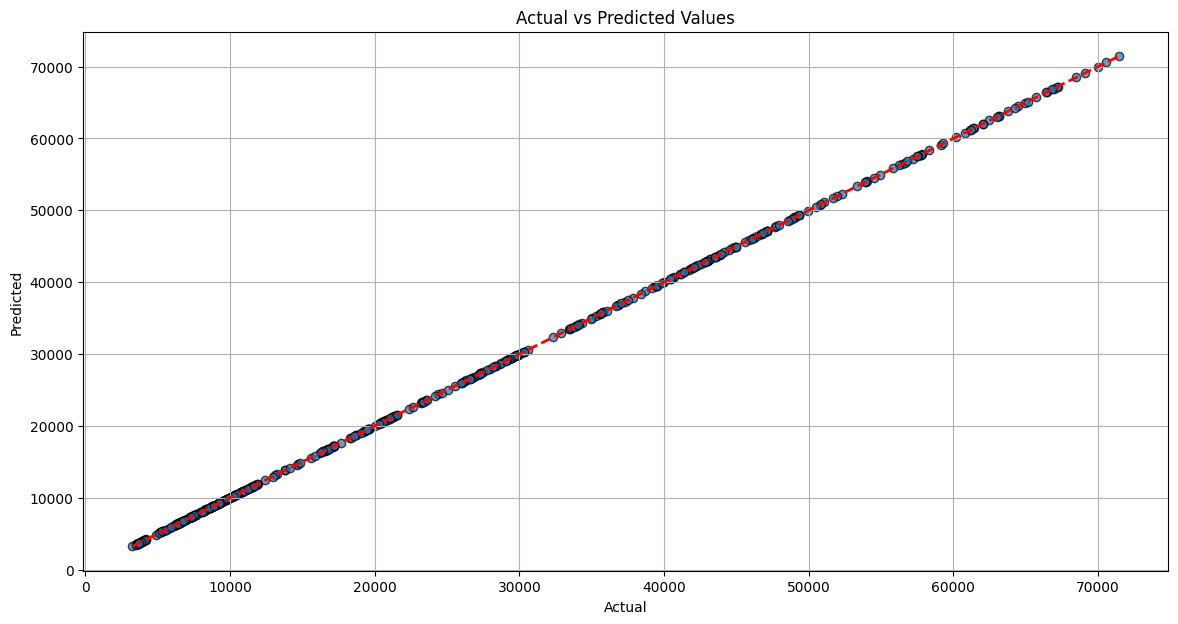

In [21]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.savefig('actual_vs_predicted_values.png')  # Save the plot
plt.show()

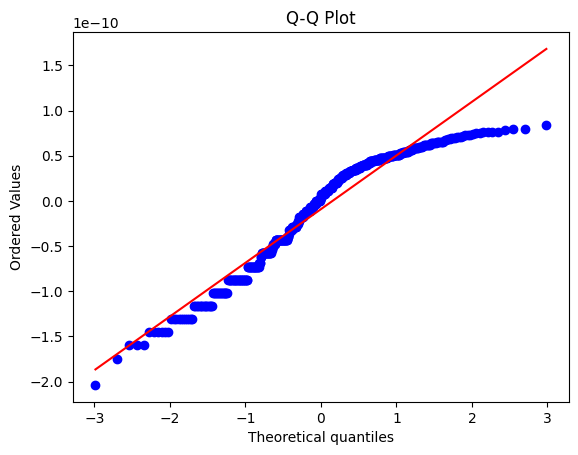

In [22]:
# Q-Q Plot: Checks if residuals are normally distributed
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.savefig('qq_plot.png')  # Save the plot
plt.show()

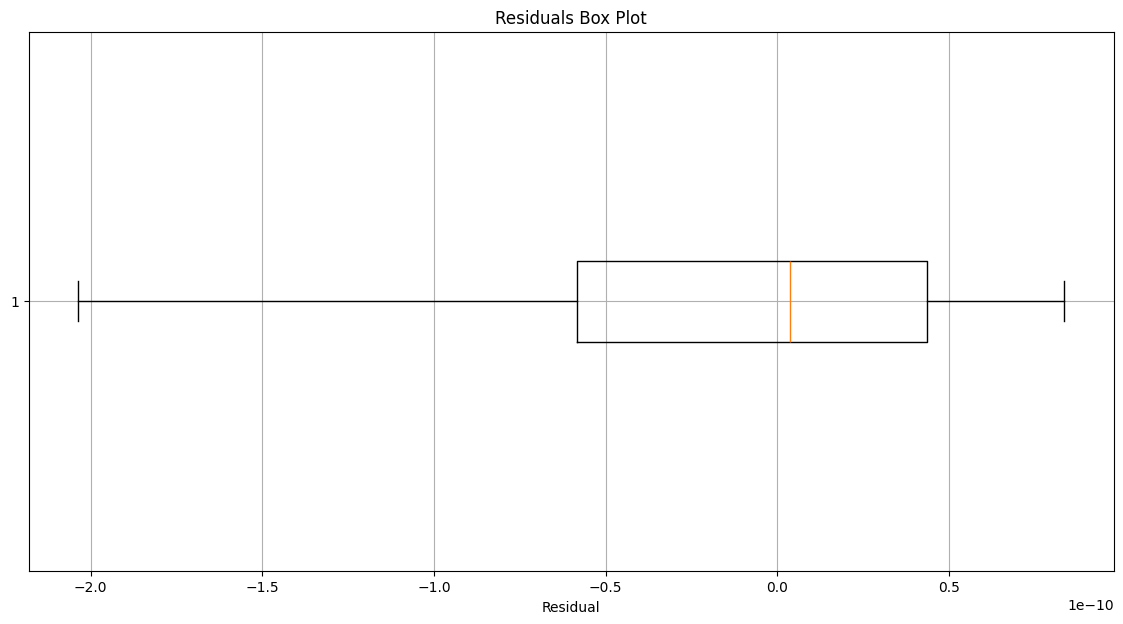

In [23]:
# Box Plot: Compare the distribution of residuals
plt.figure(figsize=(14, 7))
plt.boxplot(residuals, vert=False)
plt.title('Residuals Box Plot')
plt.xlabel('Residual')
plt.grid(True)
plt.savefig('residuals_box_plot.png')  # Save the plot
plt.show()

In [24]:
# Correlation Coefficient: Measure the correlation between actual and predicted values
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.9999999999999998


In [25]:
# Lasso regression to identify and eliminate less important features by setting some coefficients to zero.
# Get the coefficients
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})

# Features selected by Lasso (non-zero coefficients)
selected_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature']
print(f'Selected Features by Lasso: {selected_features.tolist()}')
print(lasso_coefficients.sort_values(by='Coefficient', ascending=False))

Selected Features by Lasso: ['DateTime', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Volume', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Adj Close', 'ETH_Volume', 'Total Lightning Network Nodes', ' Crypto Fear Greed Index', 'Total Lightning Network Channels', 'Lightning Network Capacity BTC', 'Lightning Network Capacity USD', 'Lightning Network Capacity per Channel Average', 'Lightning Network Eccentricity-Average', 'Lightning Network Density', 'Lightning Network Clustering-Average', 'Lightning Network Cut Channels', 'Lightning Network Cut Channels Percent of Total', 'Lightning Network Channels per Node-Average', 'Lightning Network Capacity per Node-Average', 'BTC Trading Volume', 'BTC Dominance', 'BTC Market Cap', 'BTC Market Dominance', 'Number of Crypto Currencies', 'Number of Different Crypto Market Pairs ', 'Number of Different Crypto Exchanges', 'Lightning Network Transitivity', 'Lightning Network Cut Nodes', 'Lightning Network Cut Nodes Percent of Total', 'Total Node Bandwidth', 'Block

In [26]:
# Linear Regression (OLS) Model Summary
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)  # Adds a constant term to the model
ols_model = sm.OLS(y_train, X_train_scaled).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          BTC_Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.409e+24
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:01:38   Log-Likelihood:                 32050.
No. Observations:                1963   AIC:                        -6.371e+04
Df Residuals:                    1767   BIC:                        -6.261e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3751.3363   3.27e-07  -1.15e+10      0.0

In [27]:
# Model Comparison
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R-squared': [r2, r2_score(y_test, ridge_y_pred), r2_score(y_test, lasso_y_pred)],
    'MSE': [mse, mean_squared_error(y_test, ridge_y_pred), mean_squared_error(y_test, lasso_y_pred)],
    'RMSE': [rmse, np.sqrt(mean_squared_error(y_test, ridge_y_pred)), np.sqrt(mean_squared_error(y_test, lasso_y_pred))],
    'MAE': [mae, mean_absolute_error(y_test, ridge_y_pred), mean_absolute_error(y_test, lasso_y_pred)]
})

print(model_performance)

               Model  R-squared           MSE          RMSE           MAE
0  Linear Regression   1.000000  3.802765e-21  6.166656e-11  5.133366e-11
1   Ridge Regression   0.999820  6.175451e+04  2.485045e+02  1.779308e+02
2   Lasso Regression   0.999896  3.558998e+04  1.886531e+02  1.364698e+02
